In [60]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.colors import ColorConverter
import glob, os

#import warnings
#warnings.filterwarnings("ignore", message="elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison")

### plot params

In [75]:
#Table of type codes to characteristics
dico =pd.read_csv("output_dico.csv",index_col="code") #removes # in color
#,converters={"color":lambda x:ColorConverter().to_rgb(x)}
dico.dropna()

,transition_type,fossil_order,color,value,marker,marker comment
code,,,,,,
herf_rg,Sequential transitions,Gas cheaper than coal,#1f78b4,40,v,tri
simu_rg,Overlaping transitions,Gas cheaper than coal,#a6cee3,30,<,tri
fast_rg,Starting with both,Gas cheaper than coal,#b2df8a,20,>,tri
befo_rg,Starting with renewable,Gas cheaper than coal,#33a02c,10,^,tri
nothing,Using only renewable,Limit cases,#f781bf,0,x,cross
no_gc,Investing only in renewable,Limit cases,#6a3d9a,0,+,cross
herf_rc,Sequential transitions,Coal cheaper than gas,#e31a1c,-40,D,losange
simu_rc,Overlaping transitions,Coal cheaper than gas,#fb9a99,-30,s,square
fast_rc,Starting with both,Coal cheaper than gas,#fdbf6f,-20,d,losange


In [76]:
font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

data\cb_vs_csv_central
data\cvxw_vs_ress


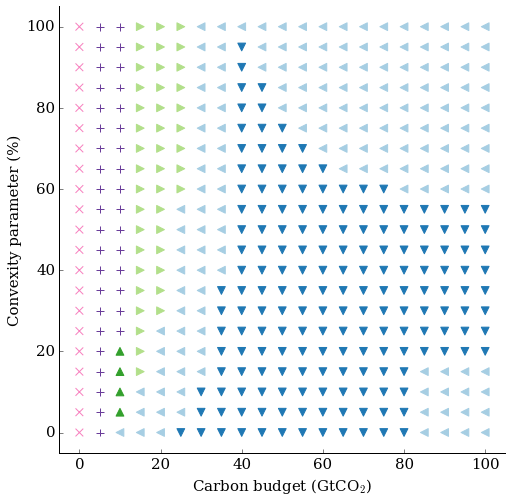

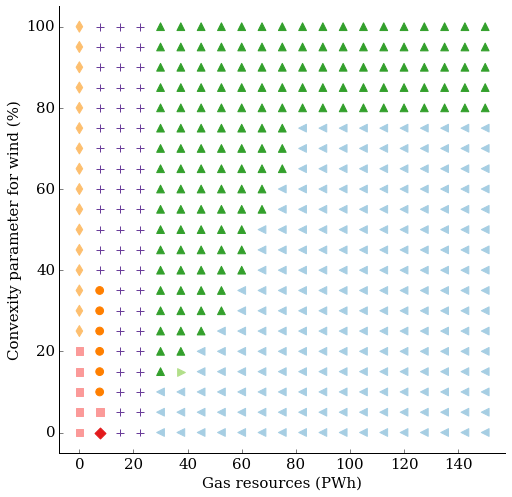

In [77]:
#loop on folders (one per plot)
for folder in glob.glob("data/*"):
    if not os.path.isdir(folder):
        continue 
    
    if folder.endswith("old"):
        continue
    
    print(folder)
    
    foldername = os.path.split(folder)[-1]
    
    #initializes empty series
    x=y=t = pd.Series([])
    columns_info = pd.read_csv(folder+"/columns_info.txt")
    dico_columns = columns_info.set_index("column_name")["value"].to_dict()
    labels = columns_info.set_index("value")["label"]
    multiplier = columns_info.set_index("value")["multiplier"].fillna(1)
    
    
    
    #loop on CSV files (concatenates the data)
    for csvfilename in glob.glob(folder+"/*.csv"):
        basename = os.path.splitext(os.path.basename(csvfilename))[0]

        #read the data
        data = pd.read_csv(csvfilename).rename(columns=dico_columns)
        data.head()

        #parse and concatenate the data 
        x = x.append(multiplier.x*data.x)
        y= y.append(multiplier.y*data.y)
        t = t.append(data.t)


    #PLOT

    fig = plt.figure(figsize=(8,8))
    ax=plt.gca()
    for mytype in dico.index:
#         print(mytype)
        idx = t[t==mytype].index
        ax.scatter(x.ix[idx],y.ix[idx],color=t.ix[idx].replace(dico["color"]),s=60,clip_on=False,marker=dico.ix[mytype,"marker"] )

    plt.xlabel(labels["x"])
    plt.ylabel(labels["y"])

    xmarg = (x.max()-x.min())*.05
    ymarg = (y.max()-y.min())*.05

    plt.xlim(x.min()-xmarg,x.max()+xmarg)
    plt.ylim(y.min()-ymarg,y.max()+ymarg)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.savefig(foldername+".pdf")
    plt.savefig(foldername+".png")


### Legend

In [78]:
d

,transition_type,fossil_order,color,value,marker,marker comment
code,,,,,,
nothing,Using only renewable,Limit cases,#f781bf,0,x,octogone
no_gc,Investing only in renewable,Limit cases,#6a3d9a,0,+,circle


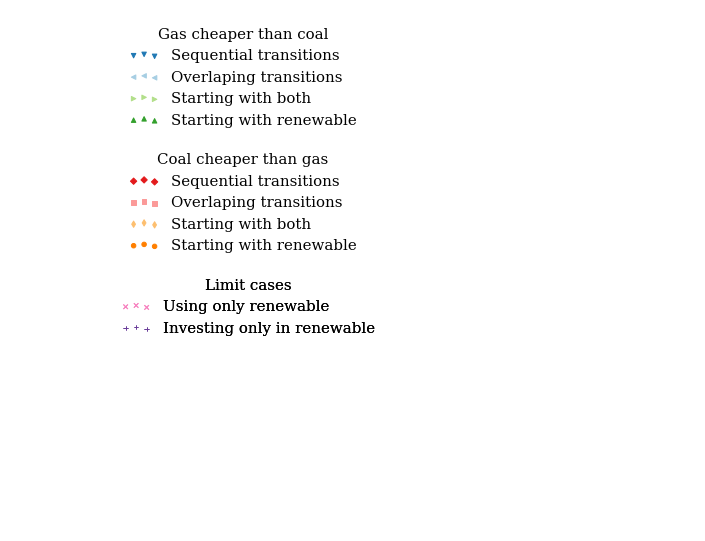

In [79]:
#Create custom artists
plt.figure(figsize=(11,9))
ax=plt.gca()

import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

#position = {"Gas cheaper than coal":"upper center","Coal cheaper than gas":"center"," ":"lower center"}

bboxes= {"Gas cheaper than coal":(0.5, 1), 
         "Coal cheaper than gas":(0.5, 0.75), 
         "Limit cases" : (0.53, 0.5)}


for marg in ["Gas cheaper than coal","Coal cheaper than gas","Limit cases"]:
    
    d = dico.query("fossil_order=='"+marg+"'")
    simArtist =[]
    for i in d.index:
        simArtist.append(plt.scatter(0,0,color=d.ix[i,"color"], marker = d.ix[i,"marker"]));

    #Create legend from custom artist/label lists
    the_legend = plt.legend(simArtist,d.transition_type.tolist(), numpoints=1,
                            title=marg, bbox_to_anchor=bboxes[marg],prop=font,
                            #loc= position[marg]
                           frameon=False)
    ax.add_artist(the_legend)
    plt.setp(the_legend.get_title(),fontsize=15)

    
plt.axis('off')
plt.ylim(0.001)

plt.savefig("transition_types_legend_vertical.pdf")

plt.savefig("transition_types_legend_vertical.png")

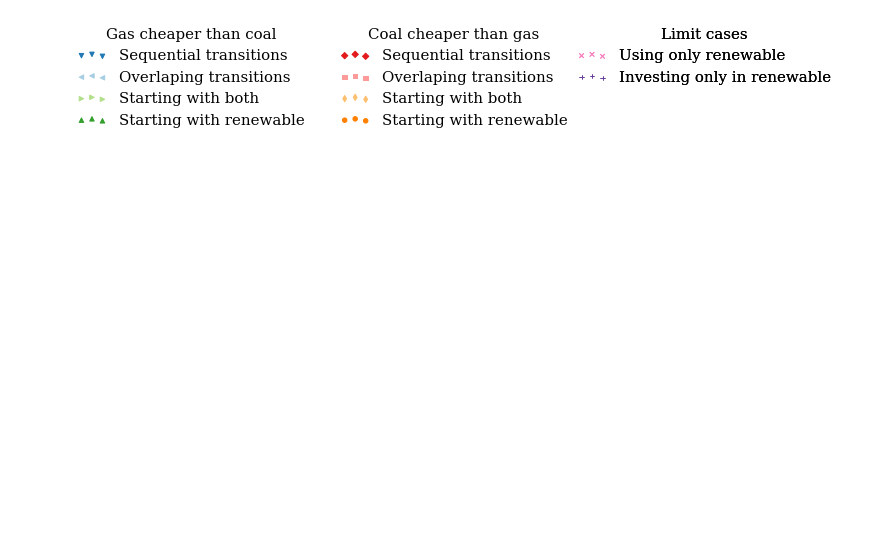

In [81]:
#Create custom artists
plt.figure(figsize=(14,9))
ax=plt.gca()

import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

position = {"Gas cheaper than coal":"upper left","Coal cheaper than gas":"upper center","Limit cases":"upper right"}

bboxes= {"Gas cheaper than coal":(0, .5), 
         "Coal cheaper than gas":(0.5, 0.5), 
         "Limit cases" : (0.75, 0.5)}


for marg in ["Gas cheaper than coal","Coal cheaper than gas","Limit cases"]:
    
    d = dico.query("fossil_order=='"+marg+"'")
    simArtist =[]
    for i in d.index:
        simArtist.append(plt.scatter(0,0,color=d.ix[i,"color"], marker = d.ix[i,"marker"]));

    #Create legend from custom artist/label lists
    the_legend = plt.legend(simArtist,d.transition_type.tolist(), numpoints=1,
                            title=marg, prop=font,
                            loc= position[marg],
                            #bbox_to_anchor=bboxes[marg],
                           frameon=False)
    ax.add_artist(the_legend)
    plt.setp(the_legend.get_title(),fontsize=15)

    
plt.axis('off')
plt.ylim(0.001)

plt.savefig("transition_types_legend_horizontal.pdf")

plt.savefig("transition_types_legend_horizonta.png")

### pdfcrop all pdfs

In [74]:
import os
for f in glob.glob("*.pdf"):
    os.system("pdfcrop "+f+" "+f)